## Описание датасета COVID-19 в округе Лос-Анджелес и штате Калифорния

### a. Предметная область, источник данных, характер данных
- **Предметная область**: Данные о случаях COVID-19 и смертях, сосредоточенные на округе Лос-Анджелес и штате Калифорния.
- **Источник данных**: Данные предоставлены без указания конкретного источника.
- **Характер данных**: Данные являются реальными, охватывают комплексную временную шкалу развития пандемии от подтвержденных случаев до сообщаемых смертей.

### b. Атрибуты датасета
В датасете представлены следующие атрибуты:
- **county** (Текстовый): Название или идентификатор округа.
- **state** (Текстовый): Название или идентификатор штата.
- **fips** (Текстовый): Код FIPS для округа.
- **date** (Дата и время): Дата и время записи данных.
- **Lat** (Числовой): Широта географического расположения.
- **Lon** (Числовой): Долгота географического расположения.
- **cases** (Числовой): Количество подтвержденных случаев COVID-19.
- **deaths** (Числовой): Количество смертей из-за COVID-19.
- **people_tested** (Текстовый): Количество людей, прошедших тестирование на COVID-19.
- **state_cases** (Числовой): Количество подтвержденных случаев COVID-19 на уровне штата.
- **state_deaths** (Числовой): Количество смертей из-за COVID-19 на уровне штата.
- **new_cases** (Числовой): Количество новых подтвержденных случаев COVID-19, сообщаемых в дату.
- **new_deaths** (Числовой): Количество новых смертей из-за COVID-19, сообщаемых в дату.
- **new_state_cases** (Числовой): Количество новых подтвержденных случаев COVID-19, сообщаемых на уровне штата.
- **new_state_deaths** (Числовой): Количество новых смертей из-за COVID-19, сообщаемых на уровне штата.

### c. Описание задачи анализа
Задача анализа данных не была конкретно определена. Целью анализа может быть изучение динамики распространения COVID-19, анализ влияния различных факторов на число случаев и смертей, а также оценка эффективности введенных мер по борьбе с пандемией.

Атрибут: cases
Среднее значение: 3600840.55
Стандартное отклонение: 422548.59
Пропущенных значений: 0


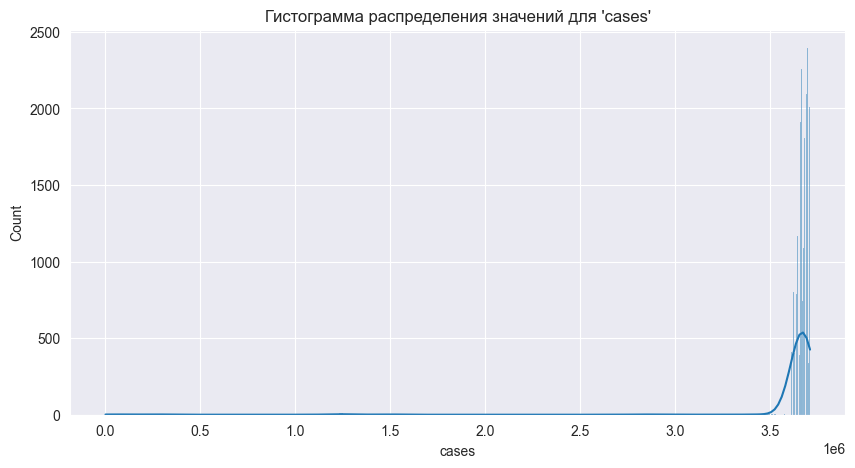

Атрибут: deaths
Среднее значение: 34618.04
Стандартное отклонение: 3195.38
Пропущенных значений: 0


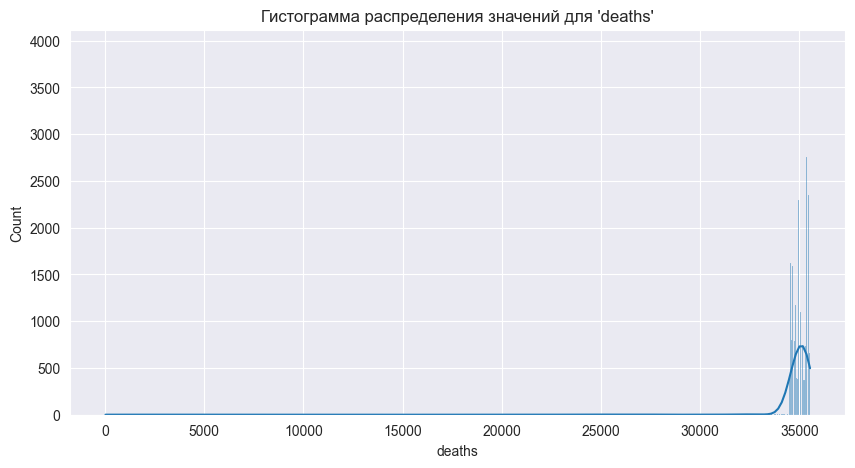

Атрибут: state_cases
Среднее значение: 11749482.97
Стандартное отклонение: 1400413.64
Пропущенных значений: 0


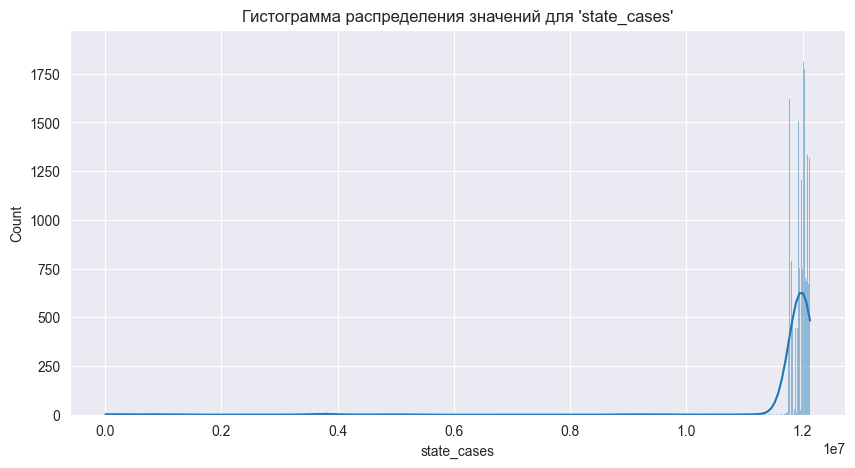

Атрибут: state_deaths
Среднее значение: 98335.01
Стандартное отклонение: 9568.88
Пропущенных значений: 0


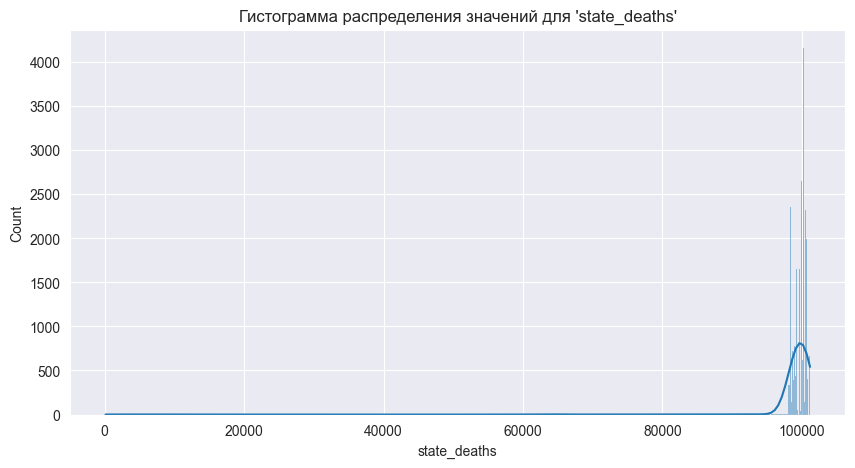

Атрибут: new_cases
Среднее значение: 1357.40
Стандартное отклонение: 2350.48
Пропущенных значений: 0


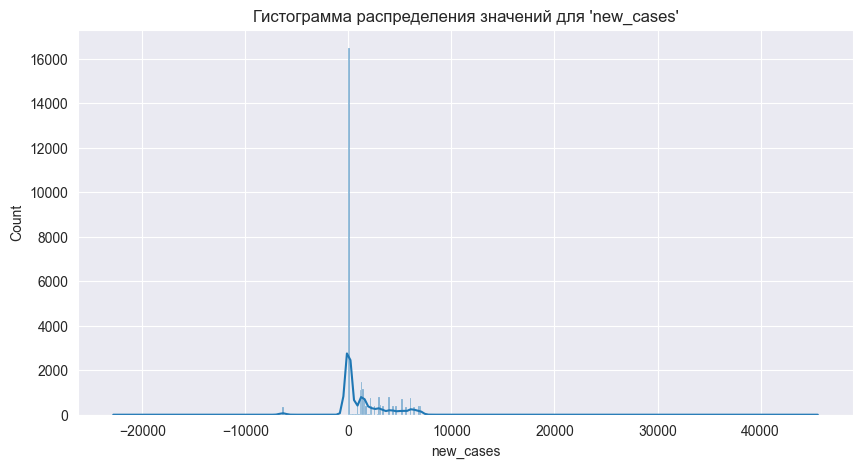

Атрибут: new_deaths
Среднее значение: 13.98
Стандартное отклонение: 47.08
Пропущенных значений: 0


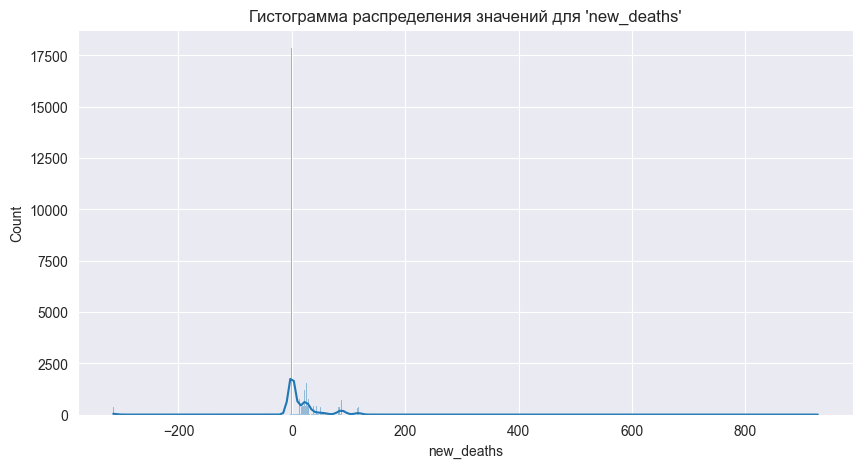

Атрибут: new_state_cases
Среднее значение: 4827.84
Стандартное отклонение: 7139.12
Пропущенных значений: 0


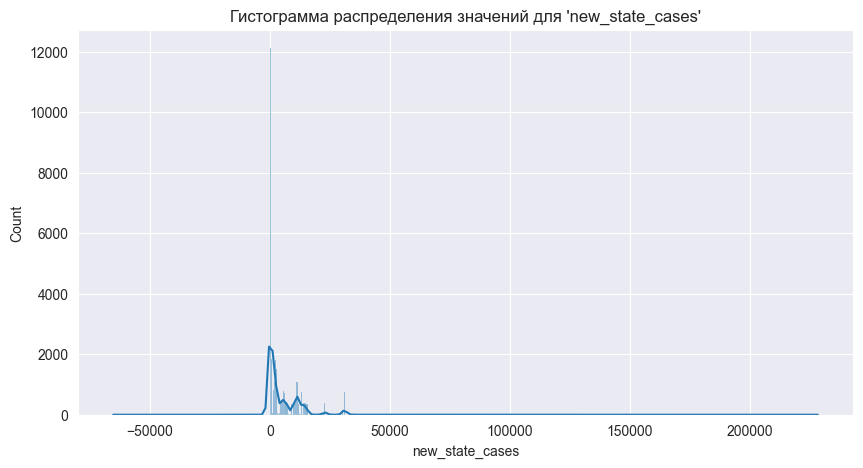

Атрибут: new_state_deaths
Среднее значение: 40.56
Стандартное отклонение: 85.38
Пропущенных значений: 0


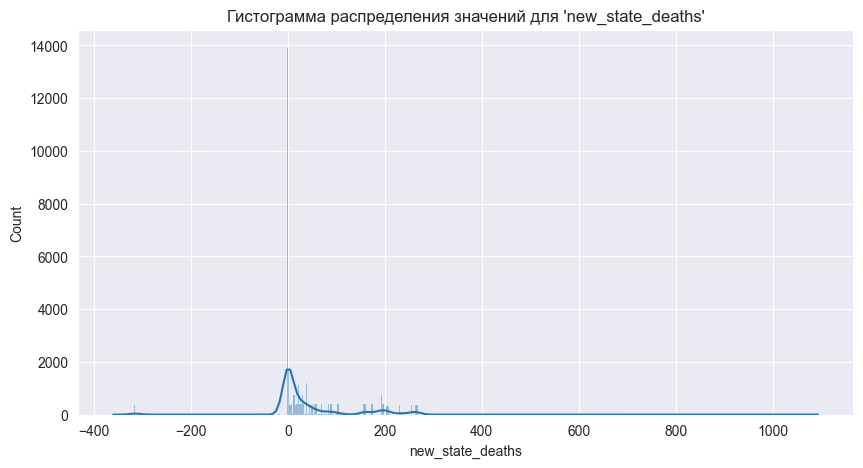

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('LA_County_COVID_Cases_20240121.csv')

# Определяем числовые колонки, исключая 'fips', 'Lat', 'Lon', 'people_tested'
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
columns_to_analyze = numerical_columns.drop(['fips', 'Lat', 'Lon', 'people_tested'])

# Анализ каждого числового атрибута, исключая 'fips', 'Lat', 'Lon', 'people_tested'
for column in columns_to_analyze:
    # Вычисляем среднее значение и стандартное отклонение
    mean_val = data[column].mean()
    std_val = data[column].std()
    # Определяем количество пропущенных значений
    missing_values = data[column].isnull().sum()
    
    print(f"Атрибут: {column}")
    print(f"Среднее значение: {mean_val:.2f}")
    print(f"Стандартное отклонение: {std_val:.2f}")
    print(f"Пропущенных значений: {missing_values}")
    
    # Обработка пропущенных значений: заполнение средним значением
    if missing_values > 0:
        data[column] = data[column].fillna(mean_val)
        print(f"Пропущенные значения в '{column}' заполнены средним значением.")
    
    # Построение гистограммы распределения значений атрибута
    plt.figure(figsize=(10, 5))
    sns.histplot(data[column].dropna(), kde=True)
    plt.title(f"Гистограмма распределения значений для '{column}'")
    plt.show()


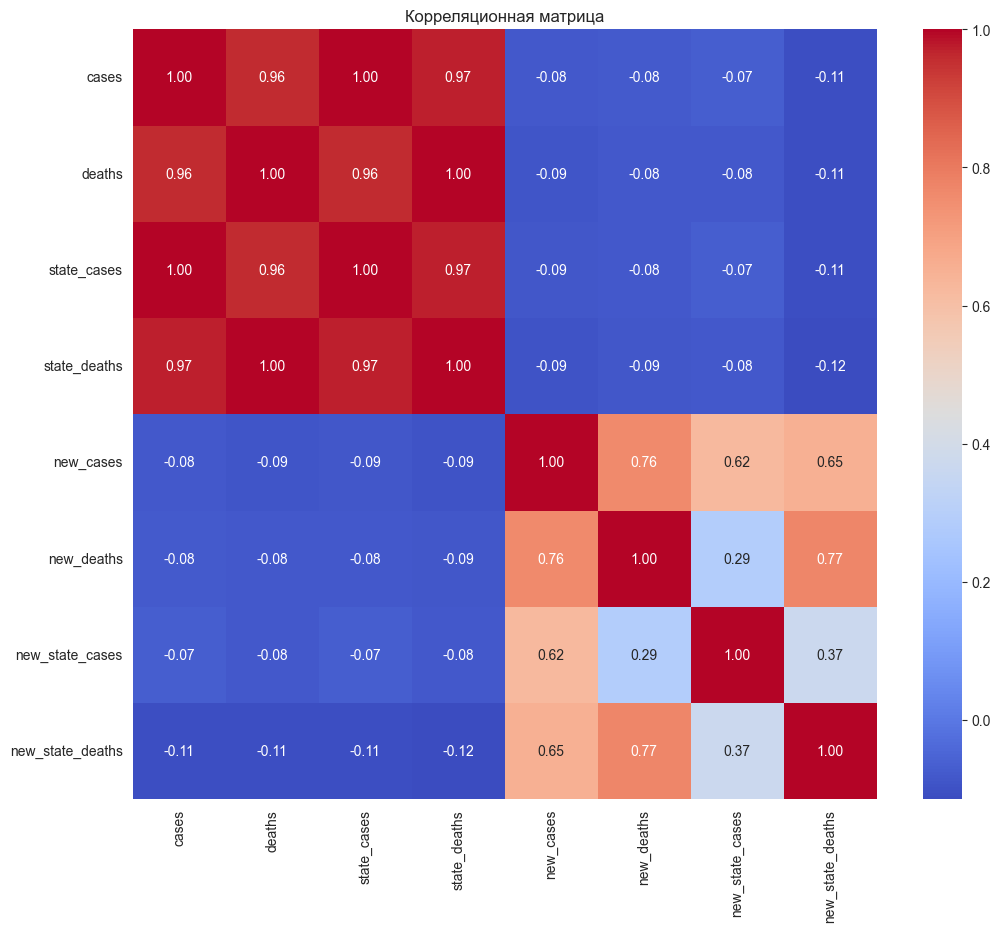

Пары атрибутов с высокой корреляцией:
state_cases   cases           0.999815
cases         state_cases     0.999815
deaths        state_deaths    0.998377
state_deaths  deaths          0.998377
cases         state_deaths    0.971552
state_deaths  cases           0.971552
state_cases   state_deaths    0.970051
state_deaths  state_cases     0.970051
deaths        cases           0.959986
cases         deaths          0.959986
deaths        state_cases     0.957800
state_cases   deaths          0.957800
dtype: float64

Пары атрибутов без корреляции:
new_state_cases  cases             -0.069395
cases            new_state_cases   -0.069395
state_cases      new_state_cases   -0.070472
new_state_cases  state_cases       -0.070472
cases            new_deaths        -0.079699
new_deaths       cases             -0.079699
deaths           new_state_cases   -0.081542
new_state_cases  deaths            -0.081542
state_cases      new_deaths        -0.082195
new_deaths       state_cases       -0.0821

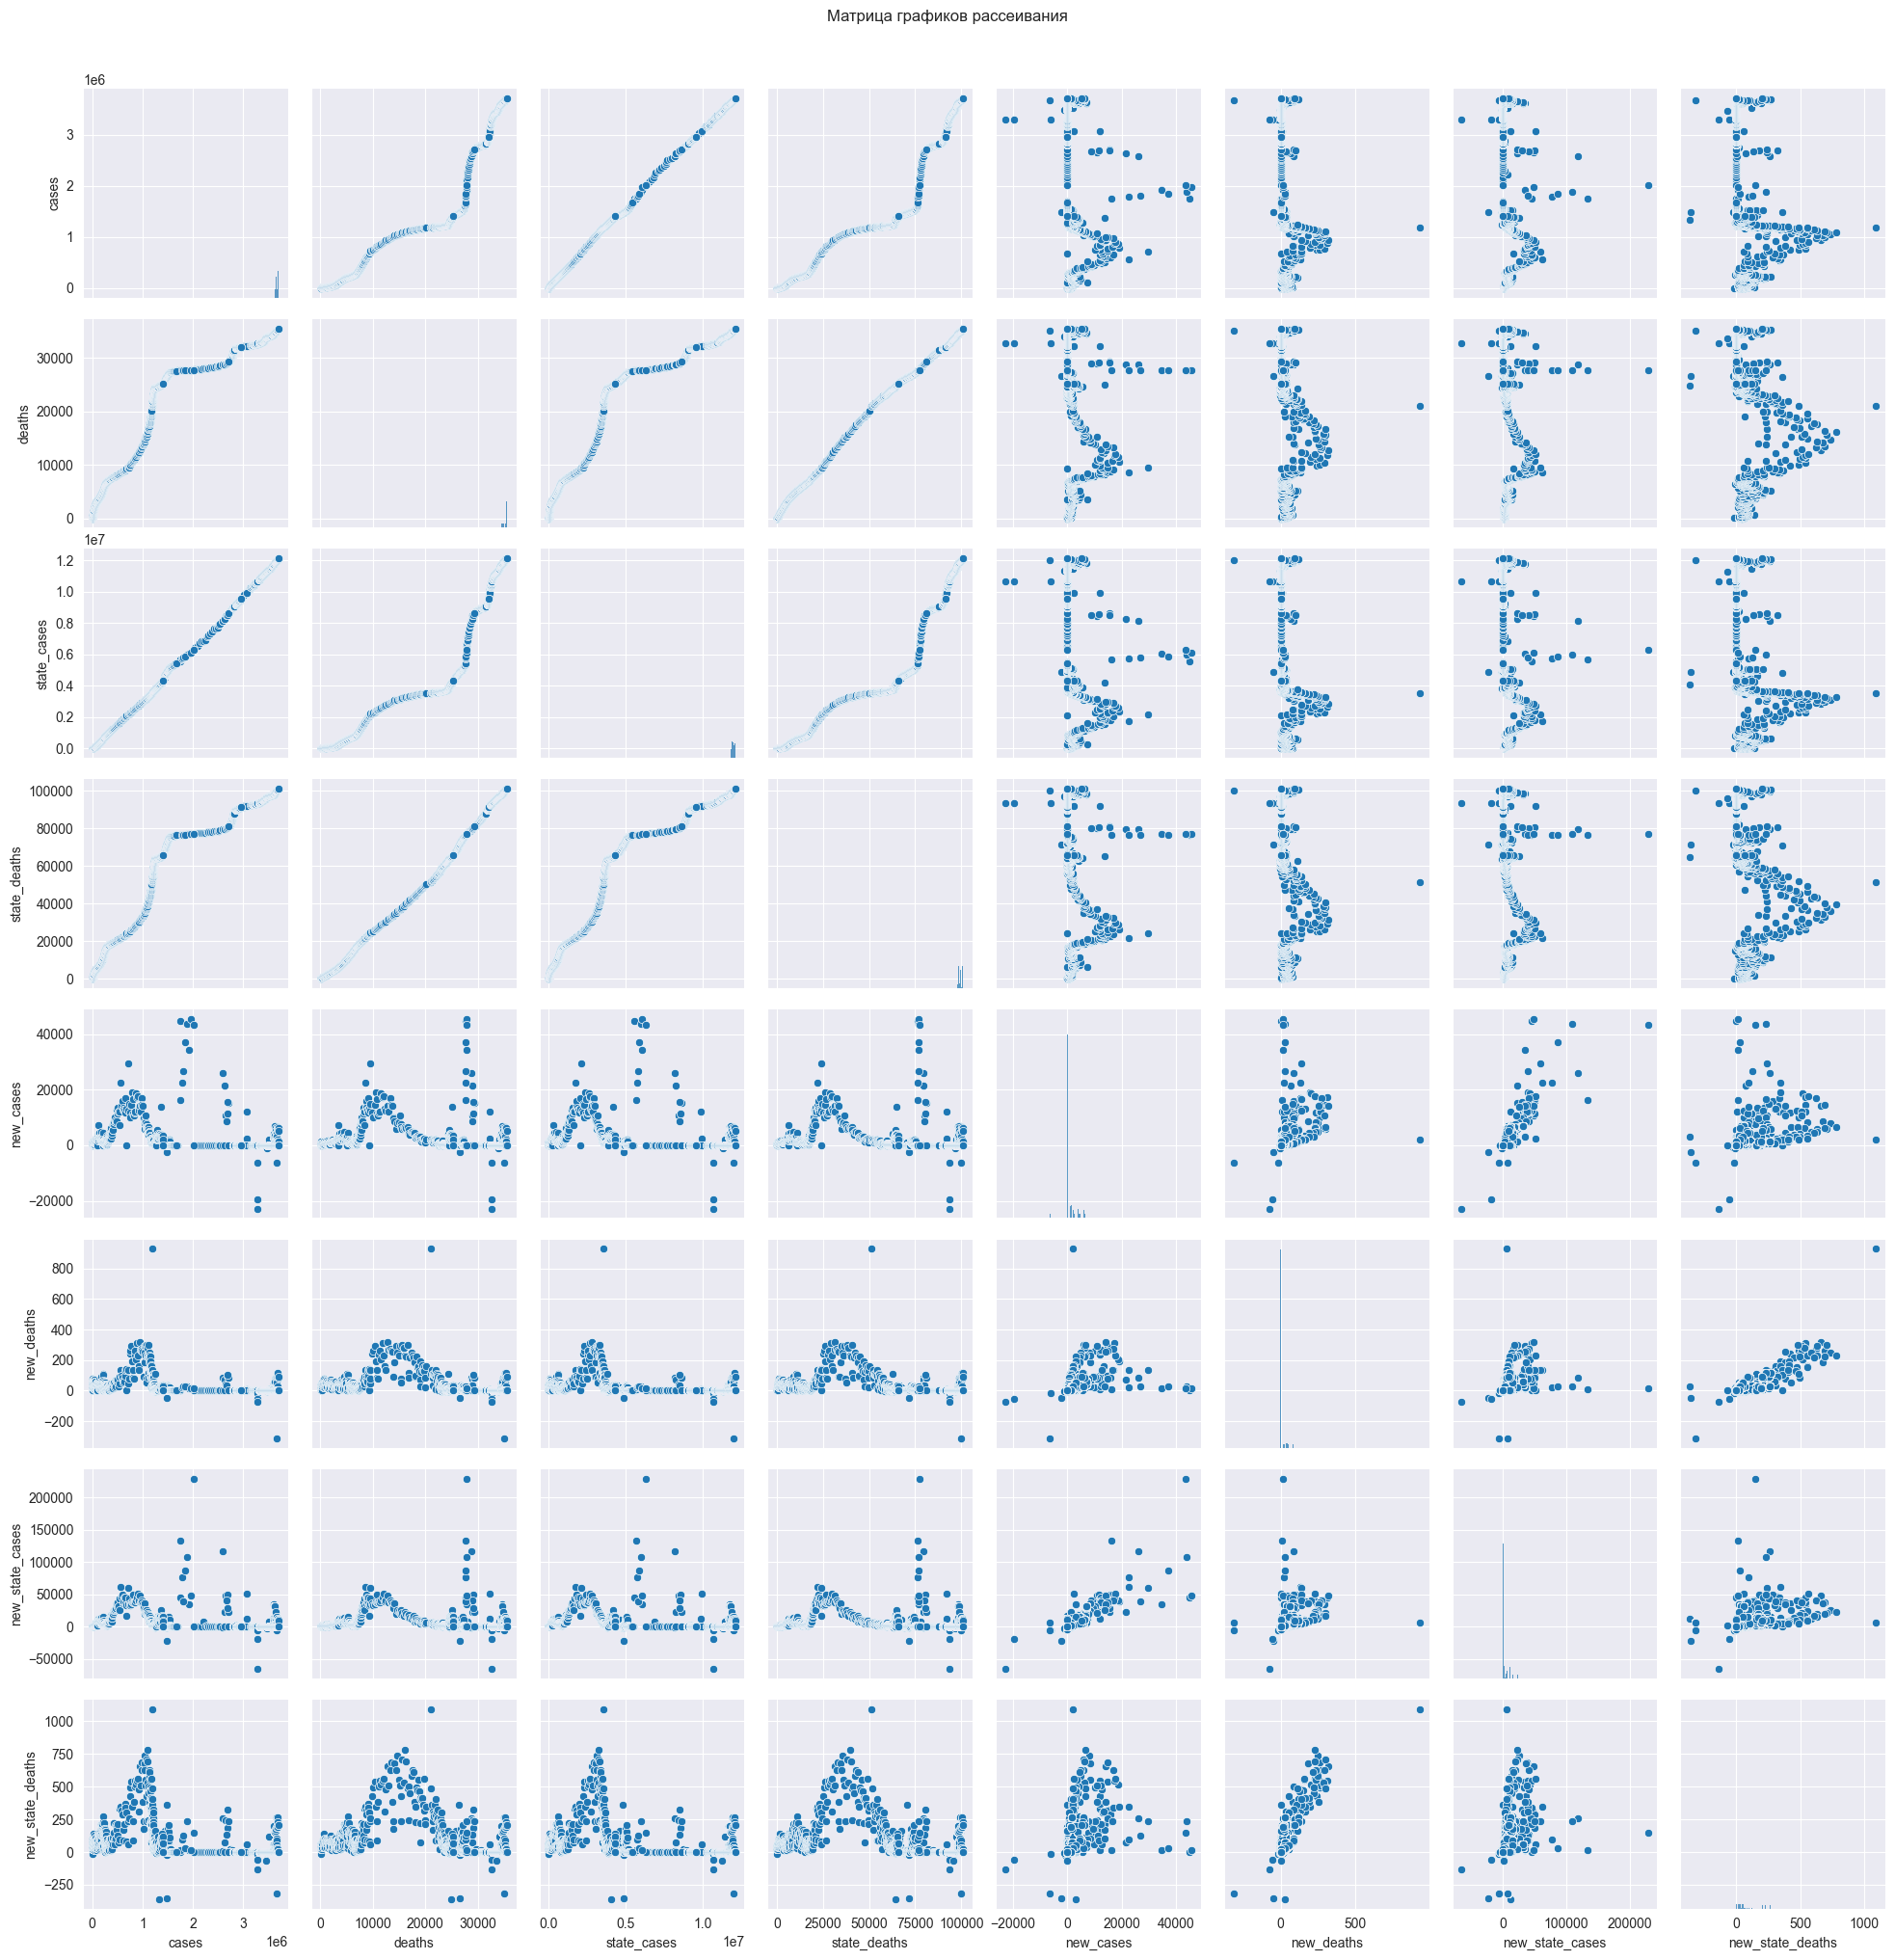

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Вычисляем корреляционную матрицу для числовых столбцов
correlation_matrix = data[columns_to_analyze].corr()

# Выводим корреляционную матрицу
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Корреляционная матрица")
plt.show()

# Определяем пары атрибутов с высокой корреляцией
high_correlation_pairs = correlation_matrix.unstack().sort_values(kind="quicksort", ascending=False)
high_correlation_pairs = high_correlation_pairs[high_correlation_pairs != 1] # исключаем корреляцию с самим собой
print("Пары атрибутов с высокой корреляцией:")
print(high_correlation_pairs[abs(high_correlation_pairs) > 0.8])

# Определяем пары атрибутов без корреляции
no_correlation_pairs = high_correlation_pairs[abs(high_correlation_pairs) < 0.1]
print("\nПары атрибутов без корреляции:")
print(no_correlation_pairs)

# Построение матрицы графиков рассеивания
sns.pairplot(data[columns_to_analyze])
plt.suptitle("Матрица графиков рассеивания", y=1.02)
plt.show()